In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10

# 1. Veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Normalize et
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Sınıf adları
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 4. Model tanımı
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 sınıf
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Eğitim
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Değerlendirme
test_loss, test_acc = model.evaluate(x_test, y_test)
print("✅ Test doğruluğu:", test_acc)


C:\Users\buyuk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3897 - loss: 1.6701 - val_accuracy: 0.5977 - val_loss: 1.1730
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6077 - loss: 1.1170 - val_accuracy: 0.6555 - val_loss: 1.0043
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6634 - loss: 0.9618 - val_accuracy: 0.6517 - val_loss: 0.9978
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7002 - loss: 0.8724 - val_accuracy: 0.6794 - val_loss: 0.9372
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7259 - loss: 0.7908 - val_accuracy: 0.6803 - val_loss: 0.9414
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 0.9330
✅ Test doğruluğu: 0.6802999973297119


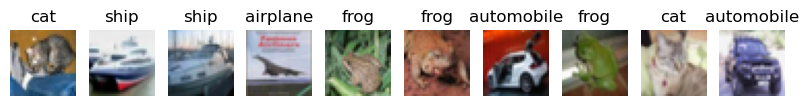

In [3]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis("off")
plt.show()


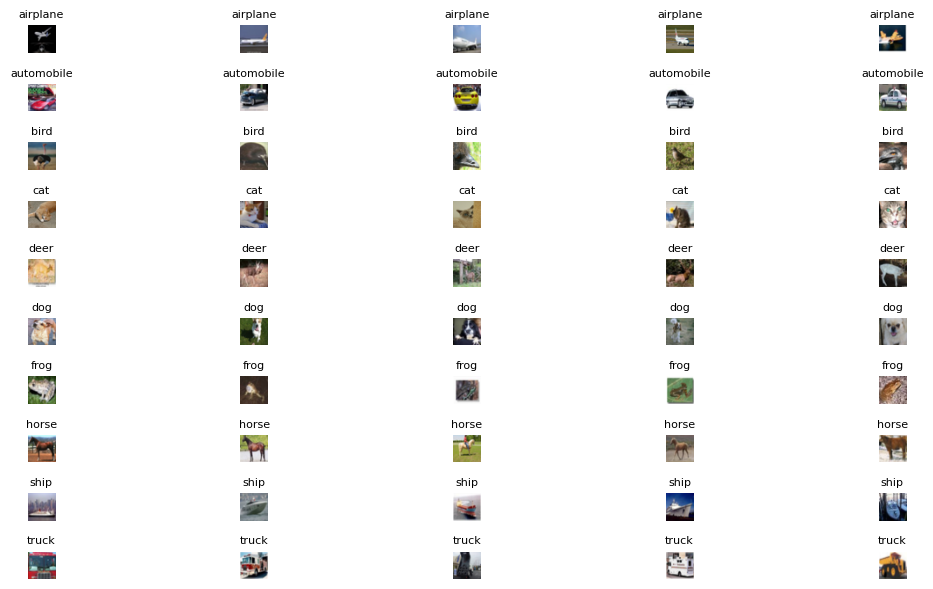

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Her sınıftan 5 rastgele görsel göster
plt.figure(figsize=(12,6))
for class_idx in range(10):
    # o sınıfa ait index’leri bul
    idxs = np.where(y_train.flatten()==class_idx)[0]
    # 5 rastgele seç
    sel = np.random.choice(idxs, 5, replace=False)
    for j, img_idx in enumerate(sel):
        plt.subplot(10, 5, class_idx*5 + j + 1)
        plt.imshow(x_train[img_idx])
        plt.title(class_names[class_idx], fontsize=8)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=10,
          validation_data=(x_test, y_test))


Epoch 1/10


C:\Users\buyuk\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6489 - loss: 1.0062 - val_accuracy: 0.6739 - val_loss: 0.9662
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6641 - loss: 0.9643 - val_accuracy: 0.7065 - val_loss: 0.8723
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6650 - loss: 0.9551 - val_accuracy: 0.6994 - val_loss: 0.8937
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6798 - loss: 0.9190 - val_accuracy: 0.7150 - val_loss: 0.8550
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6820 - loss: 0.9080 - val_accuracy: 0.6936 - val_loss: 0.9067
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6883 - loss: 0.8921 - val_accuracy: 0.7089 - val_loss: 0.8682
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6937 - loss: 0.8772 - val_accuracy: 0.7044 - val_loss: 0.8738
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7022 - loss: 0.8620 - val_accurac

In [ ]:
base = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96,3))
base.trainable = False  # önce dondur
...
# 1–2 epoch sonrası:
base.trainable = True   # tamamını aç
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_big, y_train, epochs=3, validation_data=(x_test_big, y_test))


In [ ]:
import gradio as gr

def predict(img):
    img = tf.image.resize(img, (32,32))
    img = img/255.0
    pred = np.argmax(model.predict(img[np.newaxis, ...]), axis=1)[0]
    return {class_names[p]: float(model.predict(img[np.newaxis, ...])[0][p]) for p in range(10)}

gr.Interface(fn=predict,
             inputs=gr.Image(shape=(32,32)),
             outputs=gr.Label(num_top_classes=3),
             title="CIFAR-10 Görsel Sınıflandırıcı").launch()
